<a href="https://colab.research.google.com/github/adelriscom/DataScience/blob/main/DataScience_Final_Assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Analytical/Business Questions
### What are the most structures/buildings to construct? 
### What patterns do we detect in injuries based on the time of day, the season, and so on? 
### What is the cause of the injuries? 
### Where do we need greater training and safety precautions?

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Part 2: Data Understanding



># Qualitative variables analysis

In [5]:
AccData = pd.read_csv('/content/drive/MyDrive/DataScience_UWinnipeg/OSHA HSE DATA_ALL ABSTRACTS 15-17_FINAL.csv')
# Convert the 'Event.Date' column to datetime format
AccData['Event Date'] = pd.to_datetime(AccData['Event Date'], format="%m/%d/%Y")
display(AccData)

,summary_nr,Event Date,Abstract Text,Event Description,Event Keywords,con_end,Construction End Use,build_stor,Building Stories,proj_cost,...,Event type,evn_factor,Environmental Factor,hum_factor,Human Factor,task_assigned,Task Assigned,hazsub,fat_cause,fall_ht
0,220982664,2017-08-10,"At 9:00 a.m. on August 10, 2017, an employee w...",EMPLOYEE'S FINGERS AMPUTATED WHILE OPERATING A...,"FINGER,MECHANICAL POWER PRESS,AMPUTATION,GUARD",0,,0,,0,...,Caught in or between,2,Catch Point/Puncture Action,14,Other,1,Regularly Assigned,0,0,0
1,220973937,2017-07-17,"At 9:45 a.m. on July 17, 2017, an employee was...",EMPLOYEE'S FINGER IS CAUGHT IN DRILL AND IS AM...,"CAUGHT IN,DRIVE SHAFT,RESIDENTIAL CONSTRUCTION...",H,Other building,1,1,0,...,Caught in or between,18,Other,10,Position Inappropriate For Task,1,Regularly Assigned,0,0,0
2,220967632,2017-06-30,"At 7:30 a.m. on June 30, 2017, an employee was...",EMPLOYEE IS HOSPITALIZED AFTER BEING INJURED I...,"AMPUTATED,EXPLOSION,FIREWORKS",0,,0,,0,...,Other,18,Other,4,Malfunction In Securing/Warning Op,2,Not Regularly Assigned,0,0,0
3,220969901,2017-06-30,"At 2:00 p.m. on June 30, 2017, an employee was...",EMPLOYEE FALLS FROM ROOF AND IS INJURED,"RIB,ROOF,HEAD,FALL PROTECTION,FALL,COLLARBONE,...",C,Commercial building,1,1,D,...,Fall (from elevation),13,Work-Surface/Facility-Layout Condition,14,Other,1,Regularly Assigned,0,15,0
4,220977748,2017-06-23,"At 12:20 p.m. on June 23, 2017, an employee wa...",EMPLOYEE IS STRUCK BY PLYWOOD WHILE UNLOADING ...,"STRUCK BY,TRUCK,BRAIN,NECK,FRACTURE,UNSTABLE LOAD",0,,0,,0,...,Struck-by,6,Overhead Moving/Falling Object Action,15,Insufficient/Lack/Housekeeping Program,1,Regularly Assigned,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,220778856,2015-07-01,"At approximately 9:15 a.m. on July 1, 2015, Em...","EMPLOYEE FALLS FROM BILLBOARD, SUSTAINS TRAUMA...","FALL,LOST BALANCE,LADDER",0,,0,,0,...,Fall (from elevation),18,Other,8,Perception Malfunction Task-Environment,1,Regularly Assigned,0,0,0
4843,220778096,2015-07-01,"At approximately 8:30 a.m. on July 1, 2015, Em...","EMPLOYEE FALLS FROM ELEVATION, SUSTAINS HEAD T...","FALL,LOST BALANCE,HEAD",0,,0,,0,...,Fall (from elevation),13,Work-Surface/Facility-Layout Condition,6,Equipment Inappropriate For Operation,2,Not Regularly Assigned,0,0,0
4844,220778112,2015-07-01,"At 3:00 p.m. on July 1, 2015, an employee was ...",EMPLOYEE FOUND UNRESPONSIVE BY HOME OWNER DURI...,UNCONSCIOUSNESS,0,,0,,0,...,Other,18,Other,14,Other,1,Regularly Assigned,0,0,0
4845,220777940,2015-07-01,"At approximately 2:30 p.m. on July 1, 2015, Em...",EMPLOYEE IS STRUCK AND KILLED BY LOGGING TRUCK...,"STRUCK BY,MOTOR VEHICLE",0,,0,,0,...,Struck-by,13,Work-Surface/Facility-Layout Condition,1,"Misjudgment, Hazardous Situation",1,Regularly Assigned,0,0,0


>## 1. Descriptive statistics: I use the describe() method to generate descriptive statistics for the numerical columns in my DataFrame. This method will provide me with information such as count, mean, standard deviation, minimum, and maximum values.
    

In [ ]:
# print the first few rows of the DataFrame
print(AccData.head(10))

   summary_nr Event Date                                      Abstract Text  \
0   220982664 2017-08-10  At 9:00 a.m. on August 10, 2017, an employee w...   
1   220973937 2017-07-17  At 9:45 a.m. on July 17, 2017, an employee was...   
2   220967632 2017-06-30  At 7:30 a.m. on June 30, 2017, an employee was...   
3   220969901 2017-06-30  At 2:00 p.m. on June 30, 2017, an employee was...   
4   220977748 2017-06-23  At 12:20 p.m. on June 23, 2017, an employee wa...   
5   220974562 2017-06-22  At 9:07 a.m. on June 22, 2017, an employee was...   
6   220959936 2017-05-31  At 11:00 p.m. on May 31, 2017, nineteen employ...   
7   220960629 2017-05-31  At 11:00 a.m. on May 31, 2017, an employee was...   
8   220959944 2017-05-31  At 5:15 p.m. on May 31, 2017, an employee was ...   
9   220959738 2017-05-31  At 4:45 p.m. on May 31, 2017, an employee set ...   

                                   Event Description  \
0  EMPLOYEE'S FINGERS AMPUTATED WHILE OPERATING A...   
1  EMPLOYEE'S FING

In [ ]:
print(AccData.describe())

         summary_nr   build_stor  nature_of_inj  part_of_body   event_type  \
count  4.847000e+03  4847.000000    4847.000000   4847.000000  4847.000000   
mean   2.208956e+08     0.447287      11.852486     13.629255     5.193728   
std    5.585438e+04     3.011749       7.634332      7.838927     4.608330   
min    2.207779e+08     0.000000       0.000000      0.000000     0.000000   
25%    2.208494e+08     0.000000       5.000000     10.000000     2.000000   
50%    2.209189e+08     0.000000      12.000000     13.000000     5.000000   
75%    2.209406e+08     0.000000      21.000000     19.000000     6.000000   
max    2.209923e+08   139.000000      22.000000     31.000000    14.000000   

        evn_factor   hum_factor  task_assigned    fat_cause  fall_ht  
count  4847.000000  4847.000000    4847.000000  4847.000000   4847.0  
mean     11.983701     9.456984       1.371157     3.065608      0.0  
std       6.198560     6.161380       0.483164     7.247627      0.0  
min       0.0

In [ ]:
print(AccData.shape)

(4847, 31)


In [ ]:
print(AccData.dtypes)

summary_nr                                   int64
Event Date                          datetime64[ns]
Abstract Text                               object
Event Description                           object
Event Keywords                              object
con_end                                     object
Construction End Use                        object
build_stor                                   int64
Building Stories                            object
proj_cost                                   object
Project Cost                                object
proj_type                                   object
Project Type                                object
Degree of Injury                            object
nature_of_inj                                int64
Nature of Injury                            object
part_of_body                                 int64
Part of Body                                object
event_type                                   int64
Event type                     

In [ ]:
print(AccData.isnull().sum())

summary_nr                             0
Event Date                             0
Abstract Text                          0
Event Description                      0
Event Keywords                         0
con_end                                0
Construction End Use                   0
build_stor                             0
Building Stories                       0
proj_cost                              0
Project Cost                           0
proj_type                              0
Project Type                           0
Degree of Injury                       0
nature_of_inj                          0
Nature of Injury                       2
part_of_body                           0
Part of Body                           2
event_type                             0
Event type                             2
evn_factor                             0
Environmental Factor                   7
hum_factor                             0
Human Factor                           7
task_assigned   

In [ ]:
num_cols = AccData.select_dtypes(include='number')
print(num_cols.describe())

         summary_nr   build_stor  nature_of_inj  part_of_body   event_type  \
count  4.847000e+03  4847.000000    4847.000000   4847.000000  4847.000000   
mean   2.208956e+08     0.447287      11.852486     13.629255     5.193728   
std    5.585438e+04     3.011749       7.634332      7.838927     4.608330   
min    2.207779e+08     0.000000       0.000000      0.000000     0.000000   
25%    2.208494e+08     0.000000       5.000000     10.000000     2.000000   
50%    2.209189e+08     0.000000      12.000000     13.000000     5.000000   
75%    2.209406e+08     0.000000      21.000000     19.000000     6.000000   
max    2.209923e+08   139.000000      22.000000     31.000000    14.000000   

        evn_factor   hum_factor  task_assigned    fat_cause  fall_ht  
count  4847.000000  4847.000000    4847.000000  4847.000000   4847.0  
mean     11.983701     9.456984       1.371157     3.065608      0.0  
std       6.198560     6.161380       0.483164     7.247627      0.0  
min       0.0

> ## 2. Histograms: I use histograms to visualize the distribution of your numerical data. Histograms are a great way to identify any patterns or outliers in my data.

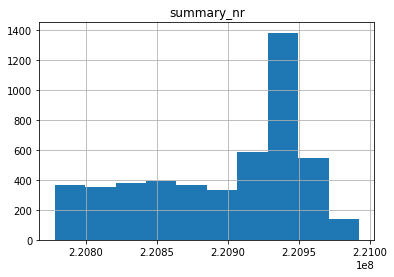

In [ ]:
num_cols = AccData.hist('summary_nr')
plt.show()

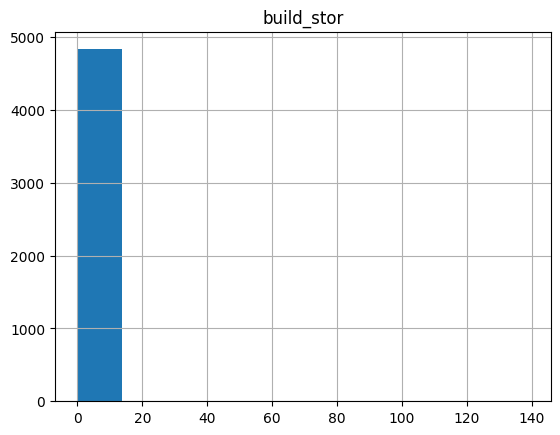

In [ ]:
num_cols = AccData.hist('build_stor')
plt.show()

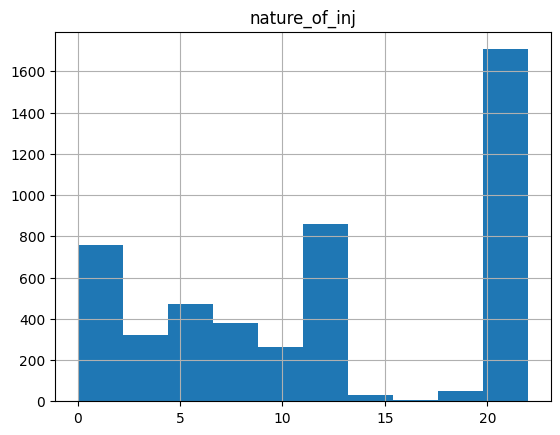

In [6]:
num_cols = AccData.hist('nature_of_inj')
plt.show()

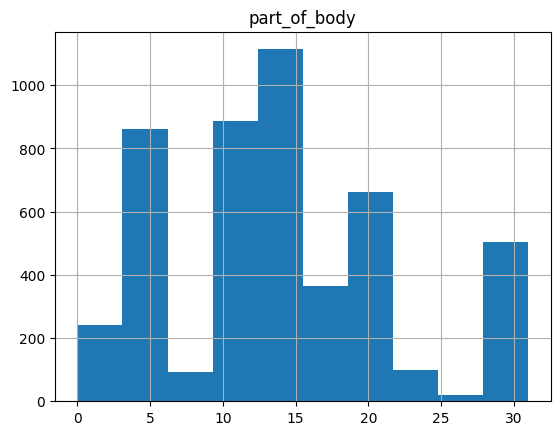

In [8]:
num_cols = AccData.hist('part_of_body')
plt.show()

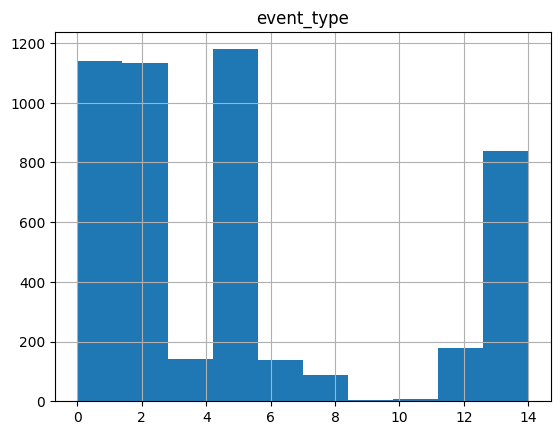

In [10]:
num_cols = AccData.hist('event_type')
plt.show()

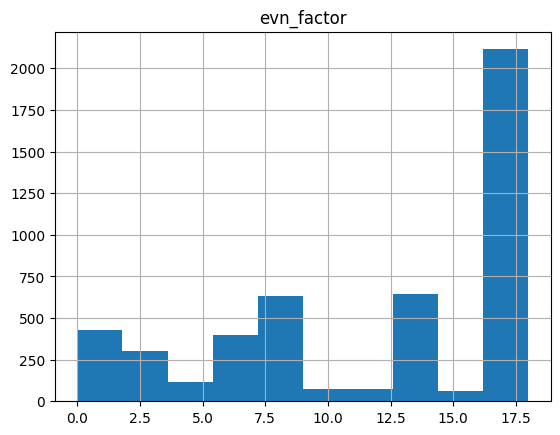

In [12]:
num_cols = AccData.hist('evn_factor')
plt.show()

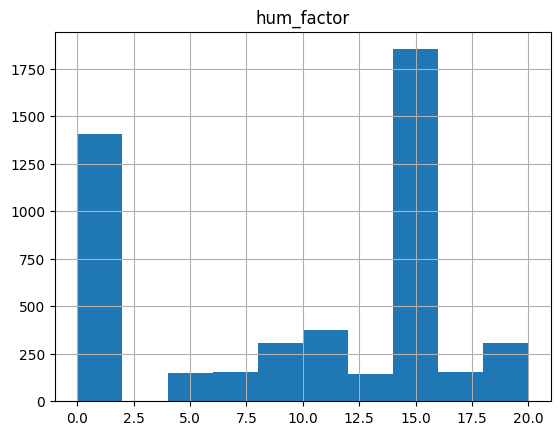

In [17]:
num_cols = AccData.hist('hum_factor')
plt.show()

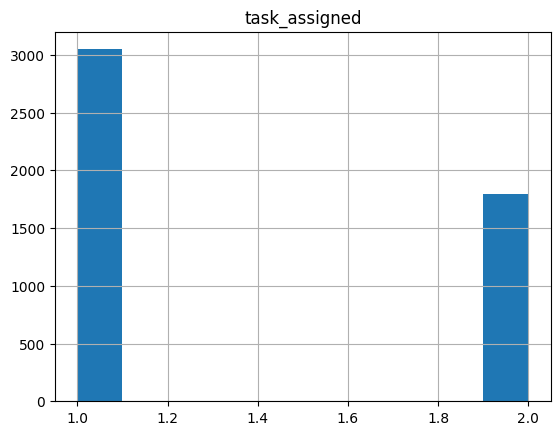

In [22]:
num_cols = AccData.hist('task_assigned')
plt.show()

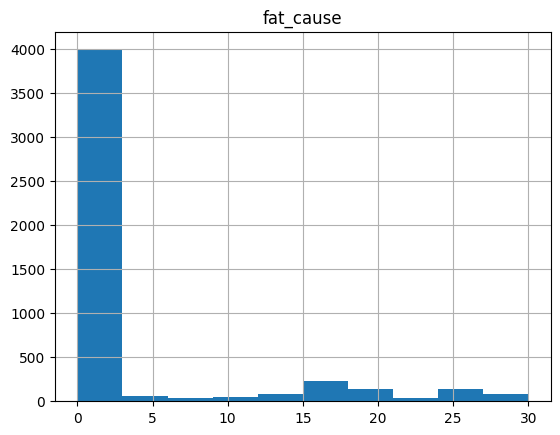

In [24]:
num_cols = AccData.hist('fat_cause')
plt.show()

>## 3. Boxplots: I use boxplots to visualize the distribution of my numerical data and to identify any outliers.

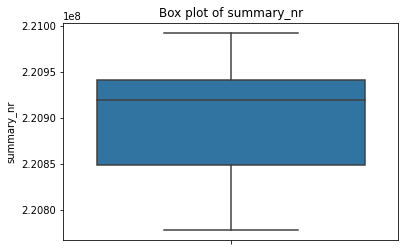

In [ ]:
# create a box plot
sns.boxplot(y='summary_nr', data=AccData)

# set the plot title
plt.title('Box plot of summary_nr')

# show the plot
plt.show()

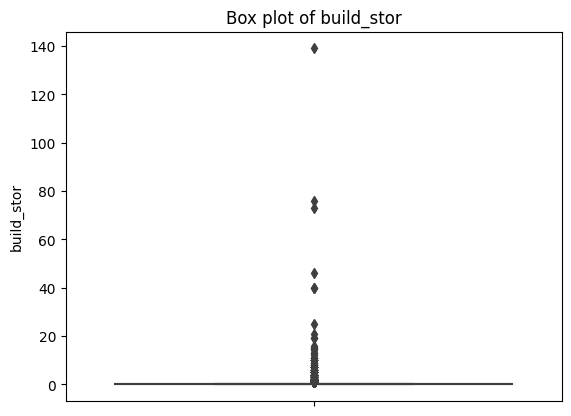

In [ ]:
# create a box plot
sns.boxplot(y='build_stor', data=AccData)

# set the plot title
plt.title('Box plot of build_stor')

# show the plot
plt.show()

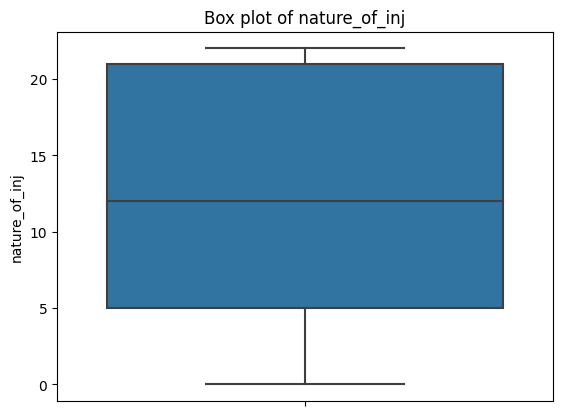

In [7]:
# create a box plot
sns.boxplot(y='nature_of_inj', data=AccData)

# set the plot title
plt.title('Box plot of nature_of_inj')

# show the plot
plt.show()

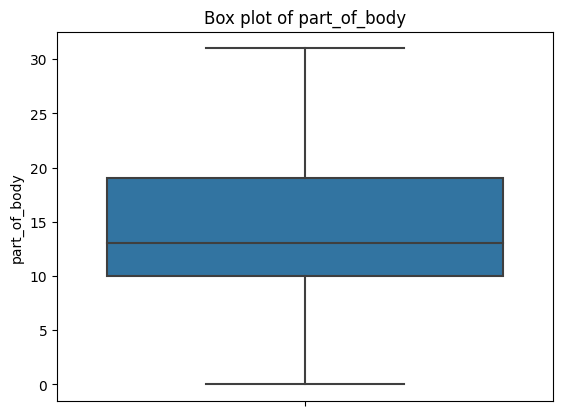

In [9]:
# create a box plot
sns.boxplot(y='part_of_body', data=AccData)

# set the plot title
plt.title('Box plot of part_of_body')

# show the plot
plt.show()

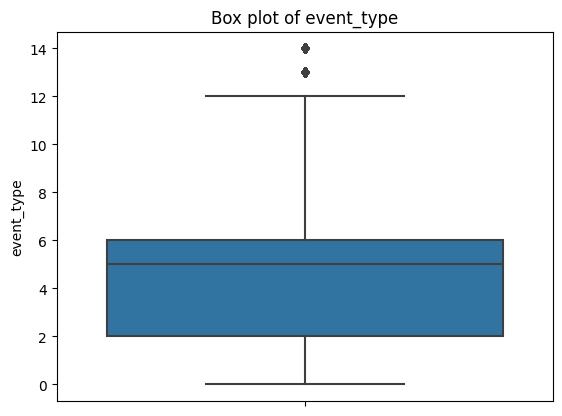

In [11]:
# create a box plot
sns.boxplot(y='event_type', data=AccData)

# set the plot title
plt.title('Box plot of event_type')

# show the plot
plt.show()

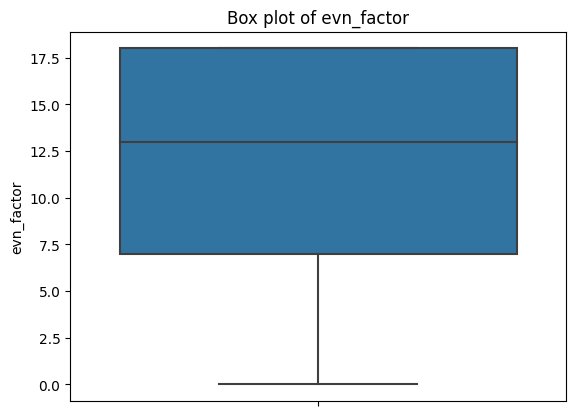

In [13]:
# create a box plot
sns.boxplot(y='evn_factor', data=AccData)

# set the plot title
plt.title('Box plot of evn_factor')

# show the plot
plt.show()

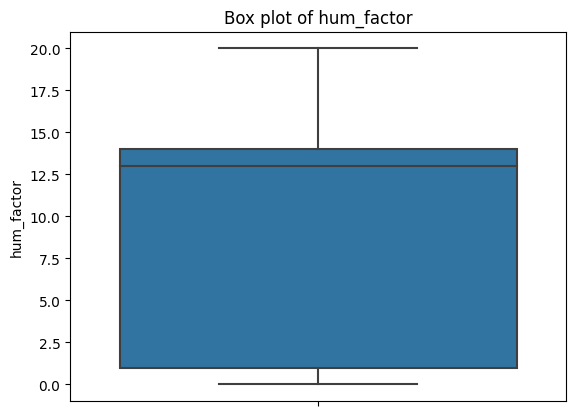

In [16]:
# create a box plot
sns.boxplot(y='hum_factor', data=AccData)

# set the plot title
plt.title('Box plot of hum_factor')

# show the plot
plt.show()

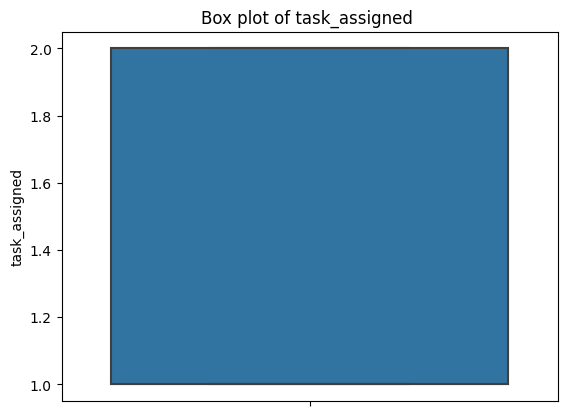

In [23]:
# create a box plot
sns.boxplot(y='task_assigned', data=AccData)

# set the plot title
plt.title('Box plot of task_assigned ')

# show the plot
plt.show()

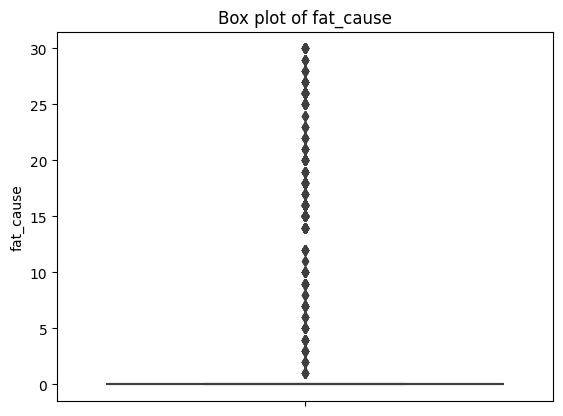

In [25]:
# create a box plot
sns.boxplot(y='fat_cause', data=AccData)

# set the plot title
plt.title('Box plot of fat_cause')

# show the plot
plt.show()

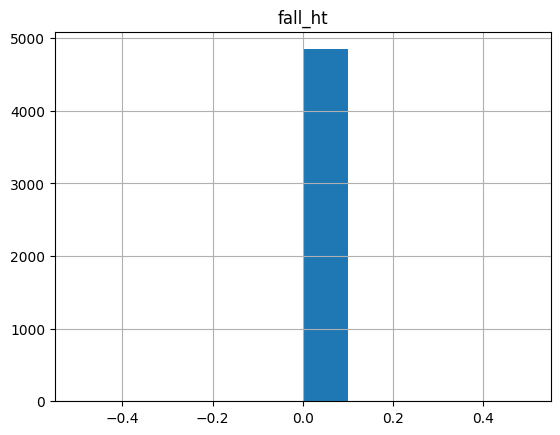

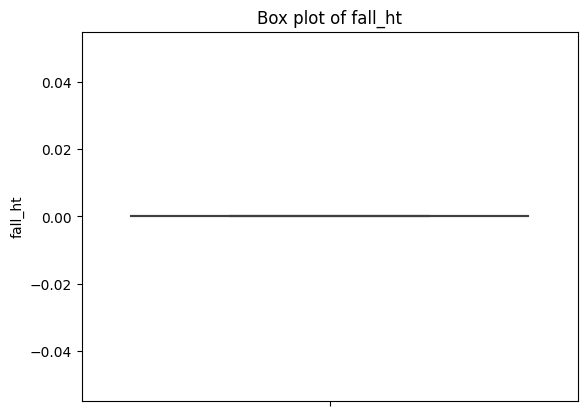

In [26]:
num_cols = AccData.hist('fall_ht')
plt.show()
# create a box plot
sns.boxplot(y='fall_ht', data=AccData)

# set the plot title
plt.title('Box plot of fall_ht')

# show the plot
plt.show()

># Categorical columns analysis

In [ ]:
# analyze the frequency distribution of the "con_end" column
con_end_counts = AccData['con_end'].value_counts()
# print the frequency distribution
print(con_end_counts)

0    3820
C     279
A     193
H     139
B     132
I      84
D      39
M      34
P      32
G      20
J      20
O      17
Q       9
E       8
F       7
K       6
N       6
L       2
Name: con_end, dtype: int64


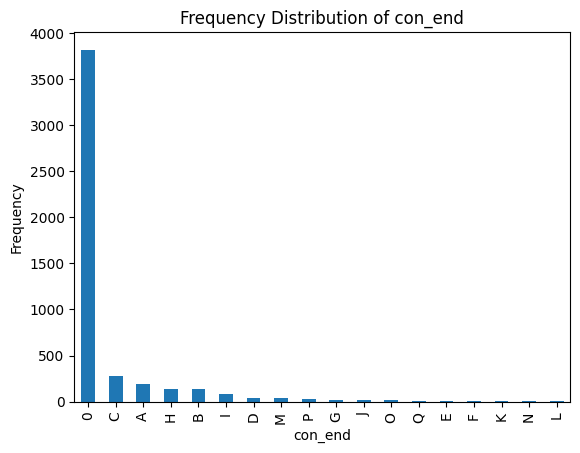

In [ ]:
# Select the column to analyze
column_to_analyze = 'con_end'

# Create a bar plot of the frequency distribution
con_end_counts.plot.bar()
plt.title('Frequency Distribution of ' + column_to_analyze)
plt.xlabel(column_to_analyze)
plt.ylabel('Frequency')
plt.show()

In [ ]:
# analyze the frequency distribution of the "Construction End Use" column
Construction_End_Use_freq = AccData['Construction End Use'].value_counts()
# print the frequency distribution
print(Construction_End_Use_freq)

                                         3820
Commercial building                       279
Single family or duplex dwelling          193
Other building                            139
Multi-family dwelling                     132
Highway, road, street                      84
Manufacturing plant                        39
Pipeline                                   34
Other heavy construction                   32
Sewer/water treatment plant                20
Bridge                                     20
Power line, transmission line              17
Contractor's yard/facility                  9
Refinery                                    8
Power plant                                 7
Tower, tank, storage ,elevator              6
Excavation, landfill                        6
Shoreline development, dam, reservoir       2
Name: Construction End Use, dtype: int64


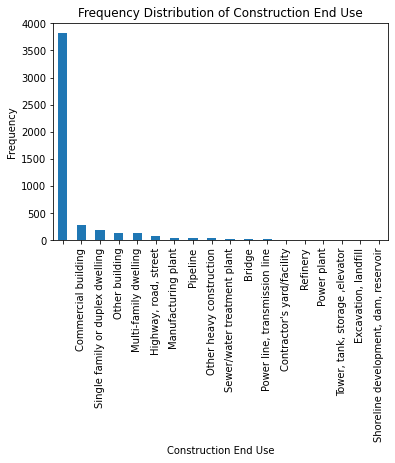

In [ ]:
# Select the column to analyze
column_to_analyze = 'Construction End Use'

# Create a bar plot of the frequency distribution
Construction_End_Use_freq.plot.bar()
plt.title('Frequency Distribution of ' + column_to_analyze)
plt.xlabel(column_to_analyze)
plt.ylabel('Frequency')
plt.show()

In [ ]:
# analyze the frequency distribution of the "proj_type" column
proj_type_freq = AccData['proj_type'].value_counts()

# print the frequency distribution
print(proj_type_freq)

0    3767
A     568
B     262
C     159
D      49
E      42
Name: proj_type, dtype: int64


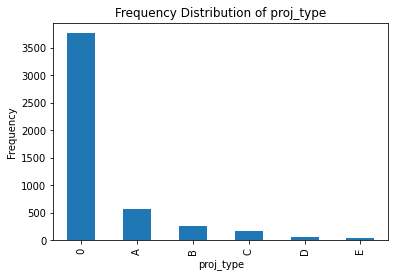

In [ ]:
# Select the column to analyze
column_to_analyze = 'proj_type'

# Create a bar plot of the frequency distribution
proj_type_freq.plot.bar()
plt.title('Frequency Distribution of ' + column_to_analyze)
plt.xlabel(column_to_analyze)
plt.ylabel('Frequency')
plt.show()

In [ ]:
# analyze the frequency distribution of the "Project Type" column
Project_Type_freq = AccData['Project Type'].value_counts()

# print the frequency distribution
print(Project_Type_freq)

                                3767
New project or new addition      568
Alteration or rehabilitation     262
Maintenance or repair            159
Demolition                        49
Other                             42
Name: Project Type, dtype: int64


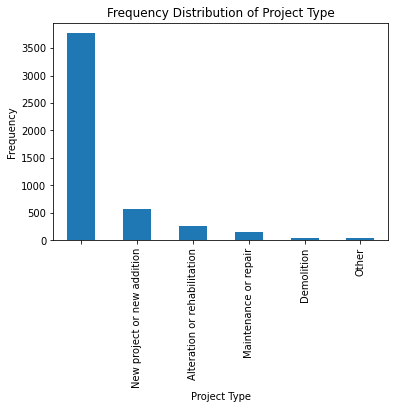

In [ ]:
# Select the column to analyze
column_to_analyze = 'Project Type'

# Create a bar plot of the frequency distribution
Project_Type_freq.plot.bar()
plt.title('Frequency Distribution of ' + column_to_analyze)
plt.xlabel(column_to_analyze)
plt.ylabel('Frequency')
plt.show()

In [ ]:
# analyze the frequency distribution of the "Nature of Injury" column
Nature_of_Injury_freq = AccData['Nature of Injury'].value_counts()

# print the frequency distribution
print(Nature_of_Injury_freq)

Serious Fall/Strike       1683
Fracture, Broken Bones     852
Amputation, Crushing       542
Laceration                 382
Head Trauma                328
Bruising, Contusion        291
Asphyxiation, Drowning     213
Electrocution              199
Fire Burn                  144
Dislocation                 64
Puncture                    48
Heat Exhaustion             32
Chemical Burn               31
Fall/strike                 23
Eye injury                   6
Poison                       4
Freezer burn                 1
Fall from Elevation          1
Illness                      1
Name: Nature of Injury, dtype: int64


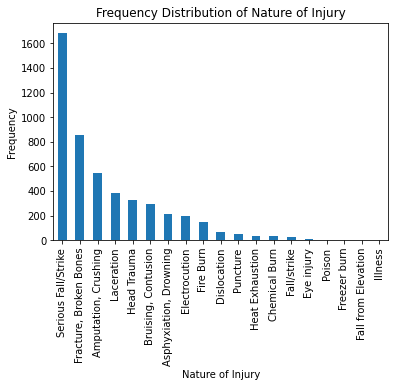

In [ ]:
# Select the column to analyze
column_to_analyze = 'Nature of Injury'

# Create a bar plot of the frequency distribution
Nature_of_Injury_freq.plot.bar()
plt.title('Frequency Distribution of ' + column_to_analyze)
plt.xlabel(column_to_analyze)
plt.ylabel('Frequency')
plt.show()

In [ ]:
# analyze the frequency distribution of the "Part of Body" column
Part_of_Body_freq = AccData['Part of Body'].value_counts()

# print the frequency distribution
print(Part_of_Body_freq)

Head                    1023
Whole Body               555
Fingers                  550
Internal Injuries        403
Heart                    374
Ribs                     305
Left Leg                 275
Hand                     212
Neck                     157
Feet                     124
Lungs (Puncture)         106
Shoulder                 102
Back                      87
Abdomen                   81
Arm                       72
Face                      72
Hip                       67
Lower Leg                 65
Wrist                     47
Multiple                  27
Femur                     26
Forearm                   25
Knee                      24
Lungs (Asphyxiation)      20
0                         15
Right Eye                 13
Liver                      9
Elbow                      7
Kidney                     2
Name: Part of Body, dtype: int64


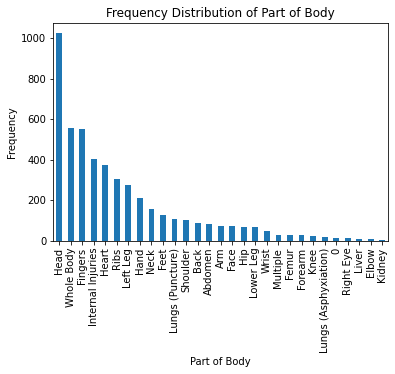

In [ ]:
# Select the column to analyze
column_to_analyze = 'Part of Body'

# Create a bar plot of the frequency distribution
Part_of_Body_freq.plot.bar()
plt.title('Frequency Distribution of ' + column_to_analyze)
plt.xlabel(column_to_analyze)
plt.ylabel('Frequency')
plt.show()

In [ ]:
# analyze the frequency distribution of the "Degree of Injury" column
degree_of_injury_freq = AccData['Degree of Injury'].value_counts()

# print the frequency distribution
print(degree_of_injury_freq)

Fatal       2964
Nonfatal    1883
Name: Degree of Injury, dtype: int64


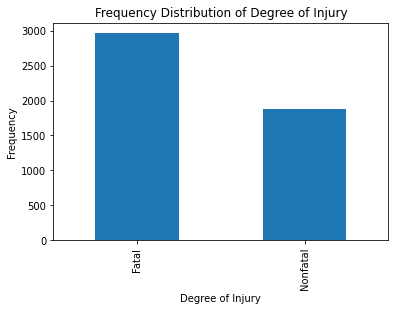

In [ ]:
# Select the column to analyze
column_to_analyze = 'Degree of Injury'

# Create a bar plot of the frequency distribution
degree_of_injury_freq.plot.bar()
plt.title('Frequency Distribution of ' + column_to_analyze)
plt.xlabel(column_to_analyze)
plt.ylabel('Frequency')
plt.show()

In [ ]:
# analyze the frequency distribution of the "Event type" column
Event_type_freq = AccData['Event type'].value_counts()

# print the frequency distribution
print(Event_type_freq)

Fall (from elevation)        1179
Struck-by                    1138
Caught in or between         1133
Other                         643
Shock                         194
Card-vascular/resp. fail.     179
Struck against                138
Fall (same level)             131
Inhalation                     82
Bite/sting/scratch              9
Rubbed/abraded                  7
Ingestion                       5
Rep. Motion/pressure            4
Absorption                      3
Name: Event type, dtype: int64


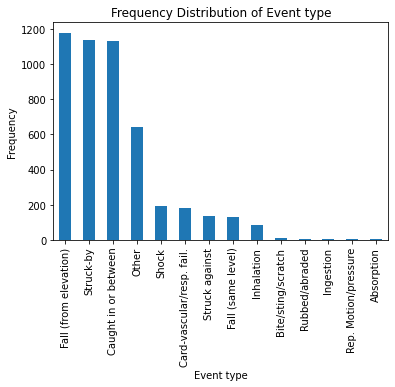

In [ ]:
# Select the column to analyze
column_to_analyze = 'Event type'

# Create a bar plot of the frequency distribution
Event_type_freq.plot.bar()
plt.title('Frequency Distribution of ' + column_to_analyze)
plt.xlabel(column_to_analyze)
plt.ylabel('Frequency')
plt.show()

In [ ]:
# analyze the frequency distribution of the "Environmental Factor" column
Environmental_Factor_freq = AccData['Environmental Factor'].value_counts()

# print the frequency distribution
print(Environmental_Factor_freq)

Other                                     2009
Materials Handling Equip./Method           635
Work-Surface/Facility-Layout Condition     608
Pinch Point Action                         422
Overhead Moving/Falling Object Action      320
Catch Point/Puncture Action                187
Shear Point Action                         114
Flying Object Action                       114
Weather, Earthquake, Etc.                  105
Gas/Vapor/Mist/Fume/Smoke/Dust              80
Temperature +/- Tolerance Lev.              73
Overpressure/Underpressure                  51
Chemical Action/Reaction Expos              40
Illumination                                34
Flammable Liquid/Solid Exposure             33
Sound Level                                 13
Radiation Condition                          2
Name: Environmental Factor, dtype: int64


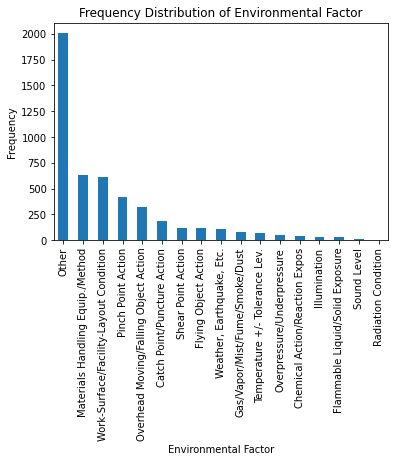

In [ ]:
# Select the column to analyze
column_to_analyze = 'Environmental Factor'

# Create a bar plot of the frequency distribution
Environmental_Factor_freq.plot.bar()
plt.title('Frequency Distribution of ' + column_to_analyze)
plt.xlabel(column_to_analyze)
plt.ylabel('Frequency')
plt.show()

In [ ]:
# analyze the frequency distribution of the "Human Factor" column
Human_Factor_freq = AccData['Human Factor'].value_counts()

# print the frequency distribution
print(Human_Factor_freq)

Other                                                    1838
Misjudgment, Hazardous Situation                         1398
Safety Devices Removed/Inoperable                         269
Position Inappropriate For Task                           219
Mater-Handling Procedure Inappropriate                    154
Insufficient /Lack/Engineering Controls                   152
Insufficient /Lack/Protective Work Clothing/Equipment     151
Insufficient /Lack/Written Work Practice Program          143
Equipment Inappropriate For Operation                     142
Lockout/Tagout Procedure Malfunction                      113
Malfunction In Securing/Warning Op                        106
Distracting Actions By Others                              41
Perception Malfunction Task-Environment                    39
Defective Equipment In Use                                 33
Insufficient/Lack/Housekeeping Program                     15
Malfunction Neuromuscular System                           14
Insuffic

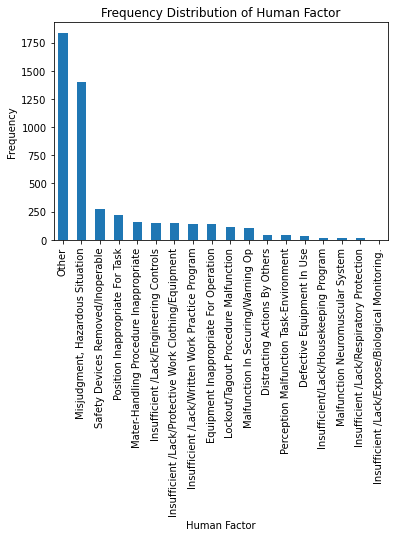

In [ ]:
# Select the column to analyze
column_to_analyze = 'Human Factor'

# Create a bar plot of the frequency distribution
Human_Factor_freq.plot.bar()
plt.title('Frequency Distribution of ' + column_to_analyze)
plt.xlabel(column_to_analyze)
plt.ylabel('Frequency')
plt.show()

In [ ]:
# analyze the frequency distribution of the "Task Assigned" column
Task_Assigned_freq = AccData['Task Assigned'].value_counts()

# print the frequency distribution
print(Task_Assigned_freq)


Regularly Assigned        3048
Not Regularly Assigned    1799
Name: Task Assigned, dtype: int64


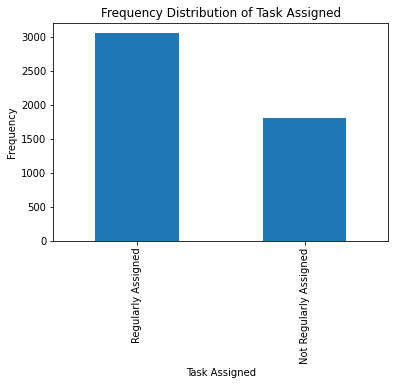

In [ ]:
# Select the column to analyze
column_to_analyze = 'Task Assigned'

# Create a bar plot of the frequency distribution
Task_Assigned_freq.plot.bar()
plt.title('Frequency Distribution of ' + column_to_analyze)
plt.xlabel(column_to_analyze)
plt.ylabel('Frequency')
plt.show()

## Cross-Tabulation: to examine the relationship between two categorical variables. This will help me identify any patterns or trends in the data.

In [ ]:
# Create a contingency table
ct = pd.crosstab(AccData["Degree of Injury"], AccData["Part of Body"])

# Print the contingency table
print(ct)

Part of Body       0  Abdomen  Arm  Back  Elbow  Face  Feet  Femur  Fingers  \
Degree of Injury                                                              
Fatal             10       69   18    31      3    21    13     15        1   
Nonfatal           5       12   54    56      4    51   111     11      549   

Part of Body      Forearm  ...  Lower Leg  Lungs (Asphyxiation)  \
Degree of Injury           ...                                    
Fatal                   4  ...         17                    14   
Nonfatal               21  ...         48                     6   

Part of Body      Lungs (Puncture)  Multiple  Neck  Ribs  Right Eye  Shoulder  \
Degree of Injury                                                                
Fatal                           75        12   130   255          2        47   
Nonfatal                        31        15    27    50         11        55   

Part of Body      Whole Body  Wrist  
Degree of Injury                     
Fatal        

In [ ]:
# Create a dictionary to map codes to descriptions
code_to_desc = dict(zip(AccData['con_end'], AccData['Construction End Use']))

# Use the map() method to create a new column with descriptions
AccData['Construction End Use Description'] = AccData['Construction End Use'].map(code_to_desc)
print(code_to_desc)
print(AccData[['Construction End Use','Construction End Use Description']])

{'0': ' ', 'H': 'Other building', 'C': 'Commercial building', 'G': 'Sewer/water treatment plant', 'B': 'Multi-family dwelling', 'I': 'Highway, road, street', 'M': 'Pipeline', 'A': 'Single family or duplex dwelling', 'D': 'Manufacturing plant', 'O': 'Power line, transmission line', 'Q': "Contractor's yard/facility", 'F': 'Power plant', 'P': 'Other heavy construction', 'J': 'Bridge', 'K': 'Tower, tank, storage ,elevator', 'L': 'Shoreline development, dam, reservoir', 'N': 'Excavation, landfill', 'E': 'Refinery'}
     Construction End Use Construction End Use Description
0                                                      NaN
1          Other building                              NaN
2                                                      NaN
3     Commercial building                              NaN
4                                                      NaN
...                   ...                              ...
4842                                                   NaN
4843        

>## 4. Correlation matrix: You can use a correlation matrix to examine the relationships between your numerical variables. This matrix will show you the correlation coefficients between each pair of variables.

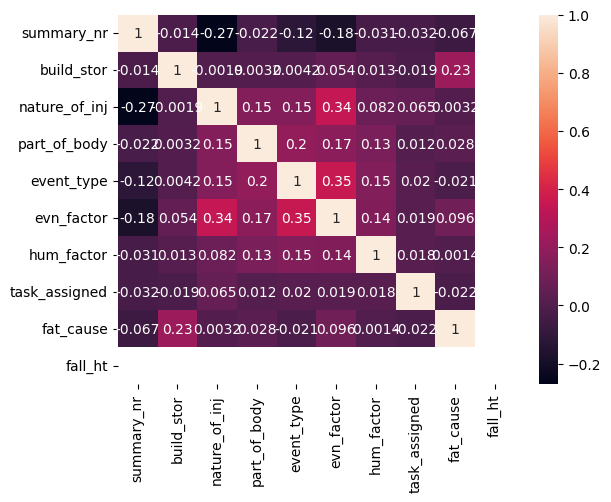

In [28]:
num_cols = AccData.select_dtypes(include='number')
corr_matrix = num_cols.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Part 3: Data Preparation

>## What are the most structures/buildings to construct?
To answer this question, we can clean the 'Construction End Use' column to remove any missing or invalid data, and then create a frequency distribution or bar plot to show the most common structures/buildings.

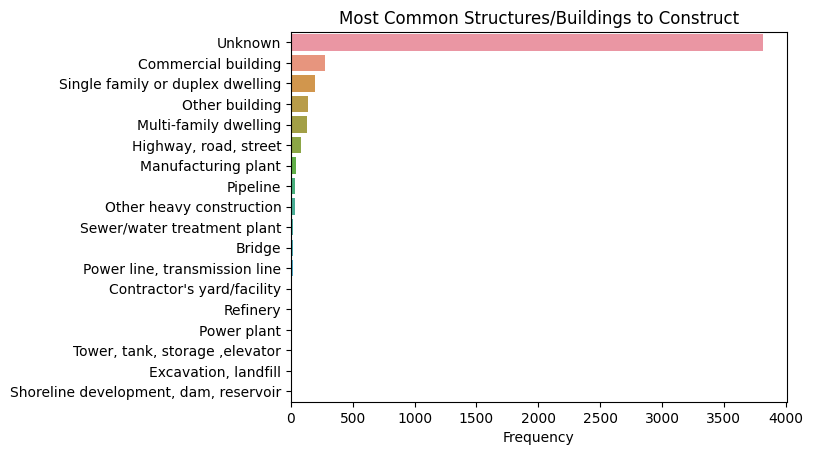

In [29]:
# Clean the 'Construction End Use' column
AccData['Construction End Use'].replace(' ', 'Unknown', inplace=True)  # Replace missing values with 'Unknown'
AccData.dropna(subset=['Construction End Use'], inplace=True)  # Drop rows with missing values

# Create a frequency distribution
freq = AccData['Construction End Use'].value_counts()

# Plot a bar plot
sns.barplot(x=freq.values, y=freq.index, orient='h')
plt.title('Most Common Structures/Buildings to Construct')
plt.xlabel('Frequency')
plt.show()

>## What patterns do we detect in injuries based on the time of day, the season, and so on?
To answer this question, we can transform the 'Date of Incident' column to extract the time of day and season, and then create a box plot or line plot to show any patterns in the data.

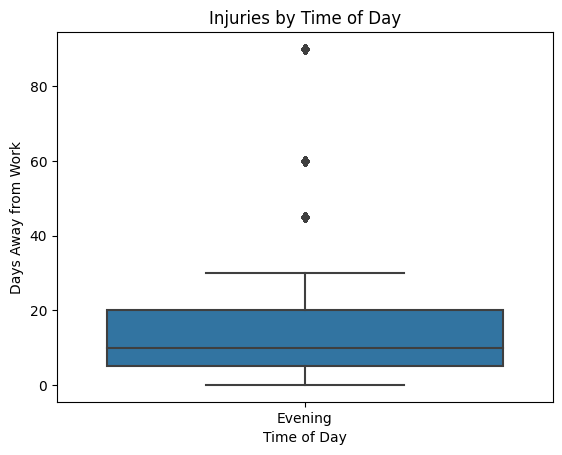

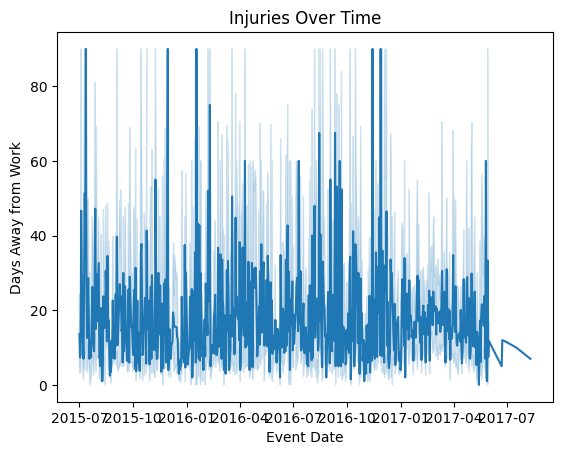

In [34]:
# Clean the 'Event Date' column
AccData.dropna(subset=['Event Date'], inplace=True)  # Drop rows with missing values

# Extract the time of day and season
AccData['Time of Day'] = pd.to_datetime(AccData['Event Date']).dt.hour.apply(lambda x: 'Morning' if 6 <= x < 12 else 'Afternoon' if 12 <= x < 18 else 'Evening')
AccData['Season'] = pd.to_datetime(AccData['Event Date']).dt.month.apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Fall')

# Create a box plot
sns.boxplot(x='Time of Day', y='Days Away from Work', data=AccData)
plt.title('Injuries by Time of Day')
plt.ylabel('Days Away from Work')
plt.show()

# Create a line plot
sns.lineplot(x='Event Date', y='Days Away from Work', data=AccData)
plt.title('Injuries Over Time')
plt.ylabel('Days Away from Work')
plt.show()

>## What is the cause of the injuries?
To answer this question, we can clean the 'Nature of Injury' column to remove any missing or invalid data, and then create a frequency distribution or bar plot to show the most common causes of injuries.

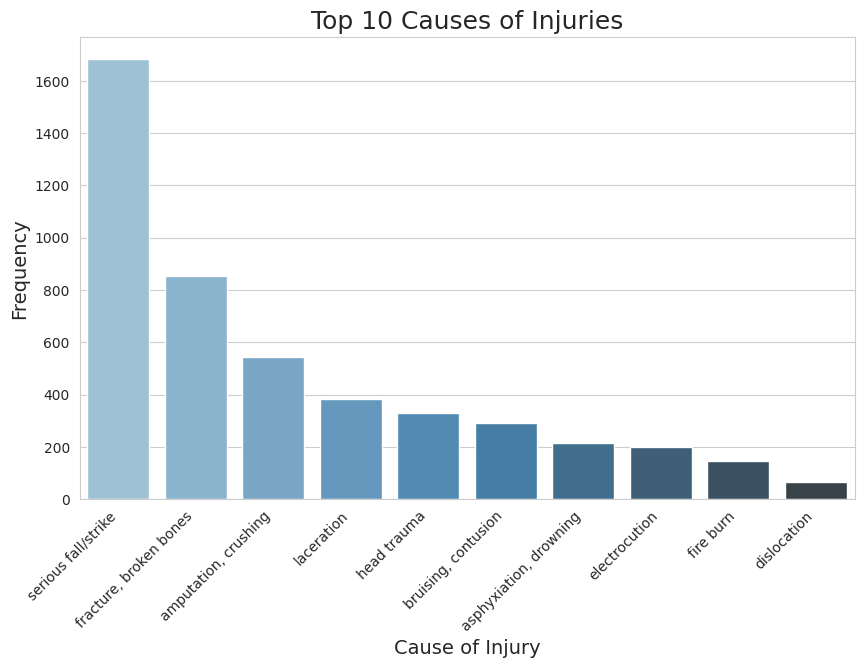

In [35]:
# Clean the 'Nature of Injury' column
AccData['Nature of Injury'] = AccData['Nature of Injury'].str.lower()
AccData['Nature of Injury'] = AccData['Nature of Injury'].str.replace('\(.*?\)', '', regex=True)
AccData['Nature of Injury'] = AccData['Nature of Injury'].str.strip()
AccData = AccData[AccData['Nature of Injury'].notna()]

# Create a frequency distribution of the top 10 causes of injuries
top_causes = AccData['Nature of Injury'].value_counts().nlargest(10)

# Create a bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_causes.index, y=top_causes.values, palette="Blues_d")
ax.set_title("Top 10 Causes of Injuries", fontsize=18)
ax.set_xlabel("Cause of Injury", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

>## Where do we need greater training and safety precautions?

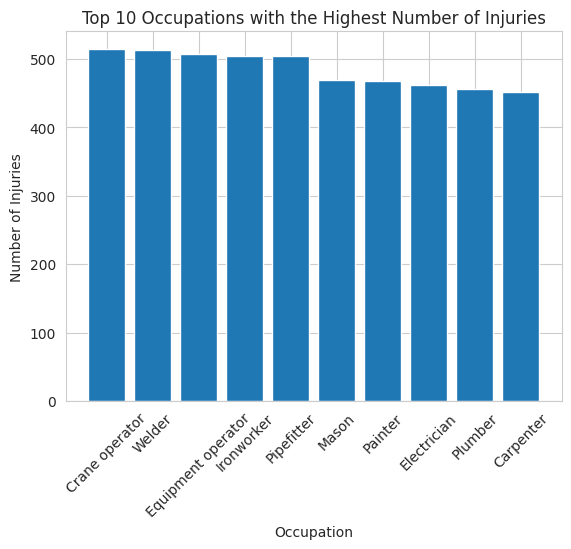

In [40]:
# Remove any missing or invalid data
AccData = AccData.dropna(subset=['Occupation'])

# Count the number of injuries for each occupation
occupation_counts = AccData['Occupation'].value_counts()

# Get the top 10 occupations with the highest number of injuries
top_occupations = occupation_counts[:10]

# Create a bar plot to visualize the results
plt.bar(top_occupations.index, top_occupations.values)
plt.title('Top 10 Occupations with the Highest Number of Injuries')
plt.xlabel('Occupation')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.show()

>## Natural Language Processing

In [44]:
# define a list of keywords to search for
keywords = ['fall', 'struck', 'electrocution', 'caught', 'crush', 'burn', 'drown']

# define a function to tokenize and count the number of occurrences of the keywords in the event description
def count_keywords(desc):
    tokens = word_tokenize(str(desc).lower())
    return sum([tokens.count(keyword) for keyword in keywords])

# apply the function to the 'Event Description' column and create a new column with the keyword counts
AccData['Keyword Count'] = AccData['Event Description'].apply(count_keywords)

# print the top 10 rows with the highest keyword counts
print(AccData.nlargest(10, 'Keyword Count')[['Event Description', 'Keyword Count']])

                                      Event Description  Keyword Count
967   EMPLOYEE IS INJURED IN FALL WHEN STRUCK BY FAL...              2
982   EMPLOYEE IS INJURED IN FALL FROM ROOF WHEN STR...              2
2043    EMPLOYEE STRUCK BY OR FALL HAZARD AND IS KILLED              2
2312   EMPLOYEE IS STRUCK BY FALL MOLD AND CRUSHES HAND              2
2617  EMPLOYEE STRUCK BY A MOTOR VEHICLE STRUCK AND ...              2
2951    EMPLOYEE IS STRUCK AND KILLED STRUCK BY RIGGING              2
3042  EMPLOYEE IS KILLED IN FALL WHEN STRUCK BY META...              2
1     EMPLOYEE'S FINGER IS CAUGHT IN DRILL AND IS AM...              1
4     EMPLOYEE IS STRUCK BY PLYWOOD WHILE UNLOADING ...              1
7     EMPLOYEE IS STRUCK BY STOVEPIPE ASSEMBLY AND I...              1


In [45]:
def clean_text(text):
    # Remove special characters and digits
    text = re.sub('[^a-zA-Z\s]', '', text)
    text = re.sub('\d+', '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    
    # Join the words back into a string
    clean_text = ' '.join(words)
    
    return clean_text

In [48]:
AccData['cleaned_description'] = AccData['Event Description'].apply(lambda x: clean_text(x))


In [ ]:
# Tokenize the cleaned text data
tokenized_data = AccData['cleaned_description'].apply(lambda x: nltk.word_tokenize(x))

# Flatten the list of tokens
all_words = [word for tokens in tokenized_data for word in tokens]

# Create a frequency distribution of the words
freq_dist = nltk.FreqDist(all_words)

# Get the most common words
most_common_words = freq_dist.most_common(10)


In [51]:
# Define a list of keywords to search for
keywords = ['fall', 'collision', 'electrical', 'exposure', 'fire', 'explosion']

# Create a regular expression pattern to match the keywords
pattern = r'\b(' + '|'.join(keywords) + r')\b'

# Extract the event keywords from the 'Event Description' column
AccData['event_keywords'] = AccData['Event Description'].str.extract(pat=pattern, flags=re.IGNORECASE)


In [52]:
# Create a frequency table of the event keywords
freq_table = pd.crosstab(index=AccData['event_keywords'], columns='count')


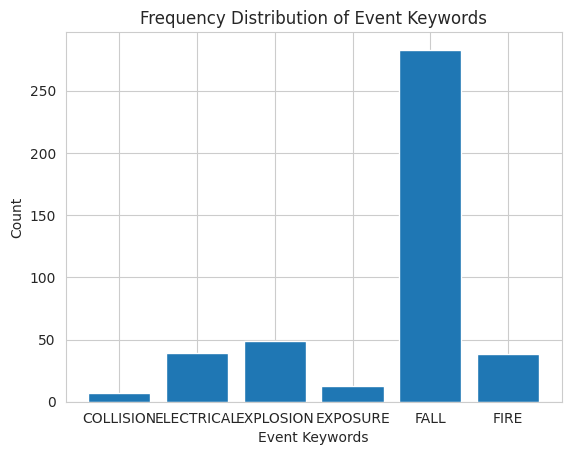

In [53]:
# Plot the frequency distribution of the event keywords
plt.bar(freq_table.index, freq_table['count'])
plt.title('Frequency Distribution of Event Keywords')
plt.xlabel('Event Keywords')
plt.ylabel('Count')
plt.show()
